# Elections SA fraud Analysis

In [2]:
import pandas as pd

# Load the dataset
#file_path = '/mnt/data/electionsClean.xlsx'
elections_df = pd.read_excel('electionsClean.xlsx')

# Display the first few rows of the dataframe to understand its structure
elections_df.head()


,Unnamed: 0,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,1,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
1,2,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
2,3,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
3,4,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832
4,5,ACTIONSA,2033,758,9871,548,743,772,854,1265,1577,18421


In [3]:
# Check if the total votes column matches the sum of votes from all regions for each party
elections_df['Computed Total'] = elections_df[
    ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 
     'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape']
].sum(axis=1)

# Add a column to indicate if there is a discrepancy
elections_df['Discrepancy'] = elections_df['Total'] != elections_df['Computed Total']

# Display rows with discrepancies
discrepancies = elections_df[elections_df['Discrepancy'] == True]
discrepancies


,Unnamed: 0,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total,Computed Total,Discrepancy
52,57,Total Valid Votes,397913,166266,369089,229281,125935,174210,88693,0,471547,2278426,2022934,True
55,62,Registered Population,"3,439,320","1,456,927","6,541,978","5,738,249","2,779,657","2,025,070","1,768,576","656,826","3,317,072","27,782,477","3,439,3201,456,9276,541,9785,738,2492,779,6572...",True


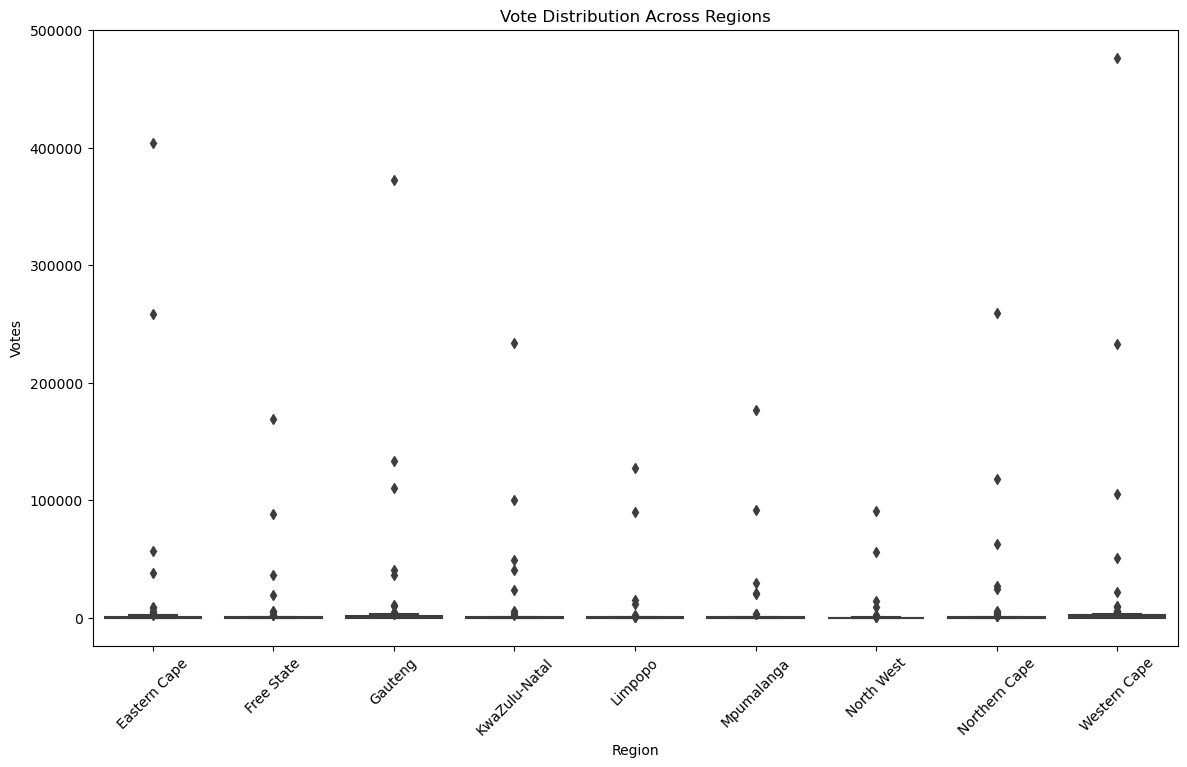

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the rows with discrepancies for further analysis
elections_df_clean = elections_df[~elections_df['Discrepancy']]

# Drop unnecessary columns for plotting
elections_df_clean = elections_df_clean.drop(columns=['Unnamed: 0', 'Computed Total', 'Discrepancy'])

# Melt the dataframe to have regions as a variable
melted_df = elections_df_clean.melt(id_vars=["Party Name", "Total"], 
                                    var_name="Region", 
                                    value_name="Votes")

# Plotting the vote distribution
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Votes', data=melted_df)
plt.title('Vote Distribution Across Regions')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Identify outliers using the IQR method for each region
def find_outliers(df, region):
    Q1 = df[region].quantile(0.25)
    Q3 = df[region].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[region] < lower_bound) | (df[region] > upper_bound)]

# Check for outliers in each region
outliers = {}
regions = ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 
           'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape']

for region in regions:
    outliers[region] = find_outliers(elections_df_clean, region)

# Display the outliers for each region
outliers


{'Eastern Cape':                            Party Name Eastern Cape Free State Gauteng  \
 13          AFRICAN NATIONAL CONGRESS       258642      88113  133191   
 16    AFRICAN TRANSFORMATION MOVEMENT         4207       1048     768   
 26                DEMOCRATIC ALLIANCE        56427      36289  110117   
 28          ECONOMIC FREEDOM FIGHTERS        37765      19633   40595   
 38  PAN AFRICANIST CONGRESS OF AZANIA         2441        388     994   
 39                 PATRIOTIC ALLIANCE         8379        906    5076   
 46                   UMKHONTO WESIZWE         5261       5053   36595   
 48         UNITED DEMOCRATIC MOVEMENT         9014        223     809   
 50                 VRYHEIDSFRONT PLUS         2985       5397   10647   
 53                       Spoilt Votes         5716       2516    3376   
 54                   Total Votes Cast       403629     168782  372465   
 
    KwaZulu-Natal Limpopo Mpumalanga North West Northern Cape Western Cape  \
 13         4893

C:\Users\User\AppData\Local\Temp\ipykernel_17108\399090658.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leading_digits = leading_digits.append(elections_df[region].apply(leading_digit))
C:\Users\User\AppData\Local\Temp\ipykernel_17108\399090658.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leading_digits = leading_digits.append(elections_df[region].apply(leading_digit))
C:\Users\User\AppData\Local\Temp\ipykernel_17108\399090658.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leading_digits = leading_digits.append(elections_df[region].apply(leading_digit))
C:\Users\User\AppData\Local\Temp\ipykernel_17108\399090658.py:27: FutureWarning: The series.append method is deprecated and will be removed from pan

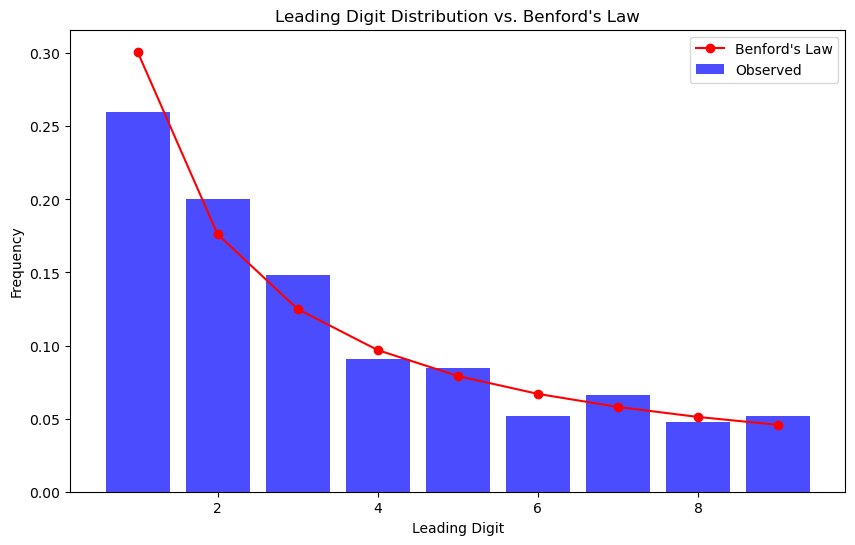

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
#file_path = 'electionsClean.xlsx'
elections_df = pd.read_excel('electionsClean.xlsx')

# Exclude unnecessary rows (like totals or non-vote counts) for cleaner analysis
elections_df = elections_df.drop([52, 55])

# Convert vote counts to numeric
regions = ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 
           'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape']

for region in regions:
    elections_df[region] = pd.to_numeric(elections_df[region], errors='coerce')

# Function to extract leading digit
def leading_digit(number):
    number = str(number).lstrip('0.')
    return int(number[0]) if number else 0

# Extract leading digits for each region and store in a single series
leading_digits = pd.Series(dtype=int)
for region in regions:
    leading_digits = leading_digits.append(elections_df[region].apply(leading_digit))

# Remove any leading zeros (if present)
leading_digits = leading_digits[leading_digits != 0]

# Compute frequency distribution of leading digits
observed_counts = leading_digits.value_counts().sort_index()
observed_freq = observed_counts / observed_counts.sum()

# Benford's expected distribution
benford_freq = [np.log10(1 + 1/d) for d in range(1, 10)]

# Plot observed vs. expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(observed_freq.index, observed_freq, alpha=0.7, label='Observed', color='blue')
plt.plot(range(1, 10), benford_freq, 'r-', marker='o', label='Benford\'s Law', color='red')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Leading Digit Distribution vs. Benford\'s Law')
plt.legend()
plt.show()
